<a href="https://colab.research.google.com/github/Saifullah785/doing-math-with-python-notes/blob/main/Chapter_06_Drawing_Geometric_Shapes_and_Fractals/Chapter_06_Drawing_Geometric_Shapes_and_Fractals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 6: Drawing Geometric Shapes and Fractals**

In [1]:
%matplotlib inline


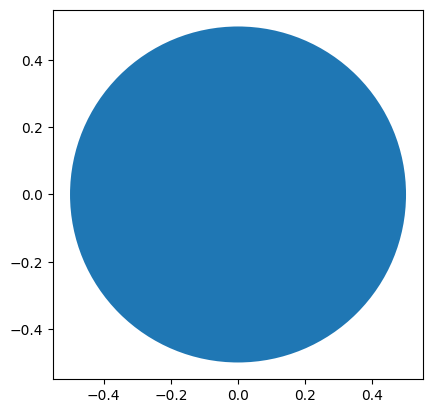

In [3]:
'''
Example of using matplotlib's circle patch

'''

'''
Example of using matplotlib's Circle patch
'''
import matplotlib.pyplot as plt

# Function to create a circle patch
def create_circle():
    # Create a circle with center at (0,0) and radius 0.5
    circle = plt.Circle((0, 0), radius = 0.5)
    return circle


# Function to display a patch
def show_shape(patch):
    # Get the current axes
    ax = plt.gca()
    # Add the patch to the axes
    ax.add_patch(patch)
    # Set the aspect ratio of the plot to be equal
    plt.axis('scaled')
    # Display the plot
    plt.show()

if __name__ == '__main__':
    # Create a circle
    c = create_circle()
    # Display the circle
    show_shape(c)

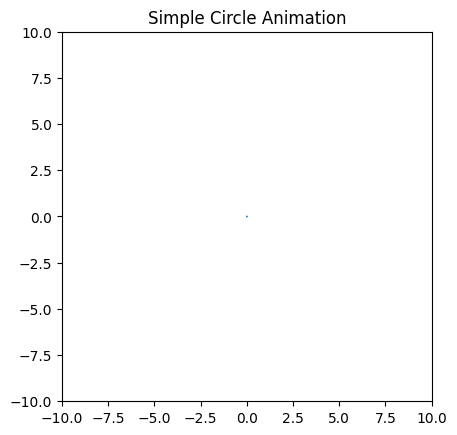

/usr/local/lib/python3.11/dist-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [4]:
'''
The animation is not viiewable in notebook. See:
http://jakevdp.github.io/blog/2013/05/12/embedding-matplotlib-animations/


A growing circle
'''

from matplotlib import pyplot as plt
from matplotlib import animation


# Function to create a circle
def create_circle():
    # Create a circle with center at (0,0) and radius 0.05
    circle = plt.Circle((0, 0), 0.05)
    return circle


# Function to update the radius of the circle for each frame of the animation
def update_radius(i, circle):
    # Set the circle's radius to i*0.5
    circle.radius = i*0.5
    # Return the updated circle
    return circle,


# Function to create the animation
def create_animation():
    # Get the current figure
    fig = plt.gcf()
    # Create an axes object with x and y limits
    ax = plt.axes(xlim=(-10, 10), ylim=(-10, 10))
    # Set the aspect ratio to be equal
    ax.set_aspect('equal')
    # Create a circle
    circle = create_circle()
    # Add the circle to the axes
    ax.add_patch(circle)
    # Create the animation
    anim = animation.FuncAnimation(fig, update_radius, fargs = (circle,), frames=30, interval=50)
    # Set the title of the plot
    plt.title('Simple Circle Animation')
    # Display the plot
    plt.show()

if __name__ == '__main__':
    # Create the animation
    create_animation()

Enter the initial velocity (m/s): 10
Enter the angle of projection (degrees): 90


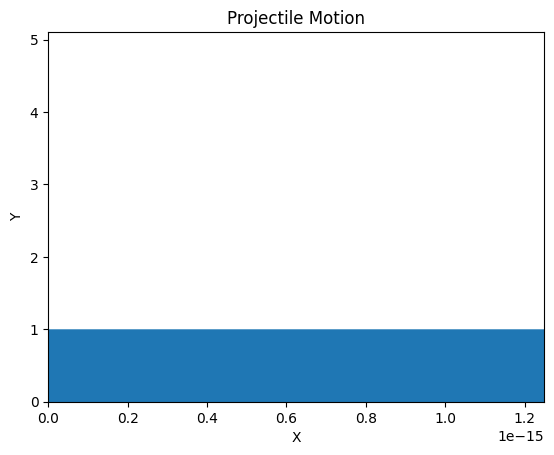

In [5]:
#P156: Animating a projectile's projectory
'''
Animate the trajectory of an object in projectile motion
'''
from matplotlib import pyplot as plt
from matplotlib import animation
import math
# Gravitational acceleration
g = 9.8


# Function to get the time intervals for the animation
def get_intervals(u, theta):
    # Calculate the total time of flight
    t_flight = 2*u*math.sin(theta)/g
    intervals = []
    start = 0
    interval = 0.005
    # Create a list of time intervals
    while start < t_flight:
        intervals.append(start)
        start = start + interval
    return intervals


# Function to update the position of the circle for each frame
def update_position(i, circle, intervals, u, theta):
    # Get the time at the current frame
    t = intervals[i]
    # Calculate the x and y coordinates of the projectile
    x = u*math.cos(theta)*t
    y = u*math.sin(theta)*t - 0.5*g*t*t
    # Update the center of the circle
    circle.center = x, y
    return circle,



# Function to create the animation
def create_animation(u, theta):
    # Get the time intervals
    intervals = get_intervals(u, theta)
    # Set the x and y limits of the plot
    xmin = 0
    xmax = u*math.cos(theta)*intervals[-1]
    ymin = 0
    t_max = u*math.sin(theta)/g
    ymax = u*math.sin(theta)*t_max - 0.5*g*t_max**2
    # Get the current figure
    fig = plt.gcf()
    # Create an axes object with the calculated limits
    ax = plt.axes(xlim=(xmin, xmax), ylim=(ymin, ymax))
    # Create a circle to represent the projectile
    circle = plt.Circle((xmin, ymin), 1.0)
    # Add the circle to the axes
    ax.add_patch(circle)
    # Create the animation
    anim = animation.FuncAnimation(fig, update_position,
                        fargs=(circle, intervals, u, theta),
                        frames=len(intervals), interval=1,
                        repeat=False)
    # Set the title and labels of the plot
    plt.title('Projectile Motion')
    plt.xlabel('X')
    plt.ylabel('Y')
    # Display the plot
    plt.show()

if __name__ == '__main__':
    try:
        # Get the initial velocity and angle from the user
        u = float(input('Enter the initial velocity (m/s): '))
        theta = float(input('Enter the angle of projection (degrees): '))
    except ValueError:
        print('You entered an invalid input')
    else:
        # Convert the angle to radians
        theta = math.radians(theta)
        # Create the animation
        create_animation(u, theta)